# imports

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from ydata_profiling import ProfileReport

# Zmienne środowiskowe

In [ ]:
# Załaduj zmienne z pliku .env
load_dotenv()

# Ścieżki do plików
DATASETS_DIR_PATH = os.getenv("DATASETS_DIR_PATH")
REPORTS_DIR_PATH = os.getenv("REPORTS_DIR_PATH")

df = pd.read_csv(os.path.join('..',os.path.join(DATASETS_DIR_PATH, 'student-mat.csv')), sep=';')


# Preprocesing

In [12]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [13]:
# Definicja kolumn kategorycznych
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Definicja kolumn numerycznych
numeric_columns = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout',
    'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2', 'G3'
]

In [14]:
# Konwersja kolumn kategorycznych do typu 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Konwersja kolumn numerycznych do typu odpowiedniego (int lub float)
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Konwersja z obsługą błędów


In [15]:
print("\nLiczba brakujących wartości w każdej kolumnie:")
print(df.isnull().sum())


Liczba brakujących wartości w każdej kolumnie:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [16]:
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print(f"\nUsunięto {initial_shape[0] - final_shape[0]} duplikatów.")


Usunięto 0 duplikatów.



Wykrywanie wartości odstających w kolumnach numerycznych:
- Kolumna 'age': 1 wartości odstających.


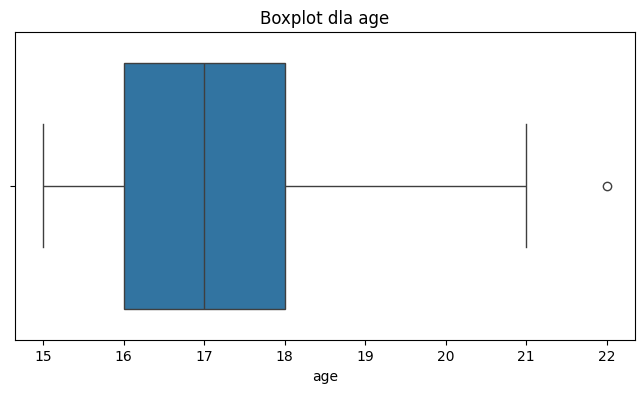

- Kolumna 'Medu': Brak wartości odstających.
- Kolumna 'Fedu': 2 wartości odstających.


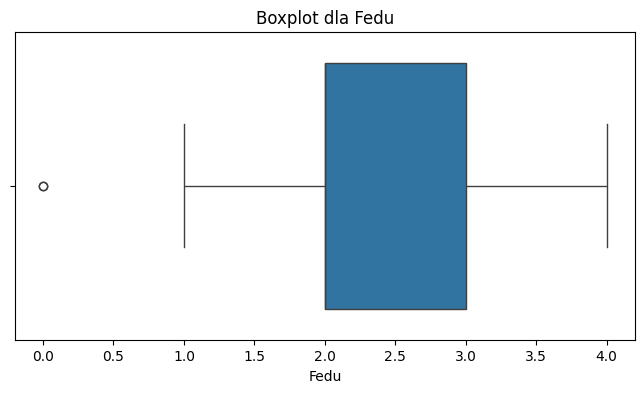

- Kolumna 'traveltime': 8 wartości odstających.


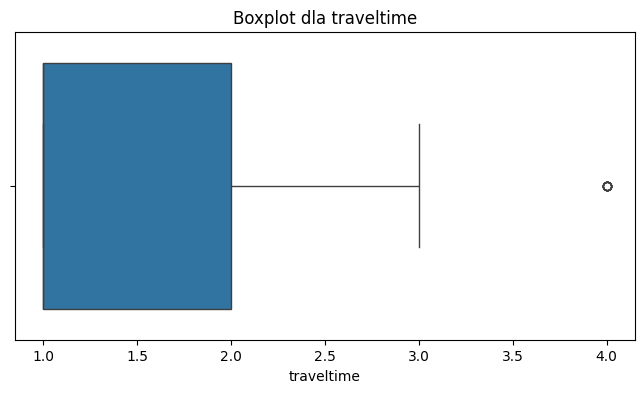

- Kolumna 'studytime': 27 wartości odstających.


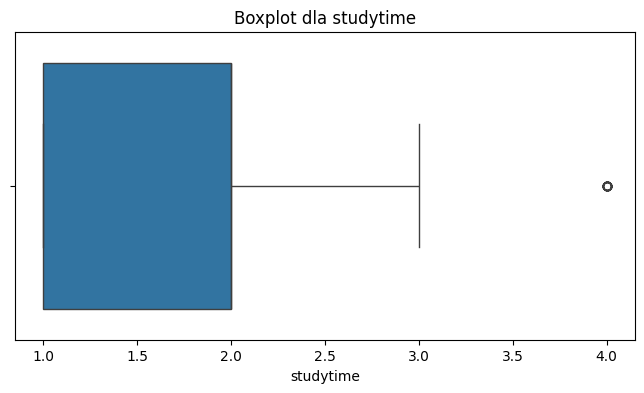

- Kolumna 'failures': 83 wartości odstających.


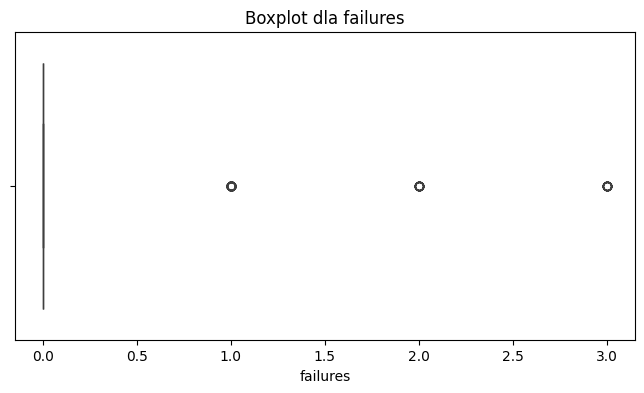

- Kolumna 'famrel': 26 wartości odstających.


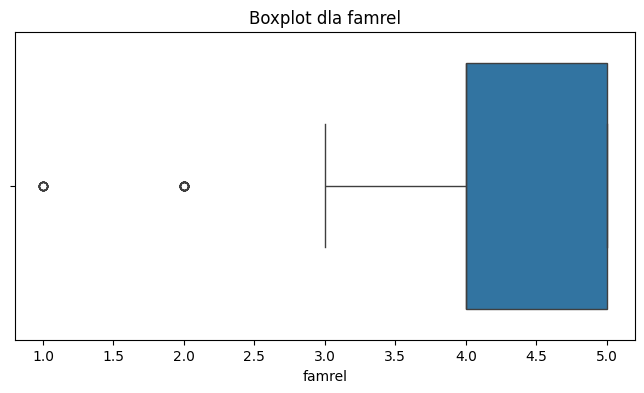

- Kolumna 'freetime': 19 wartości odstających.


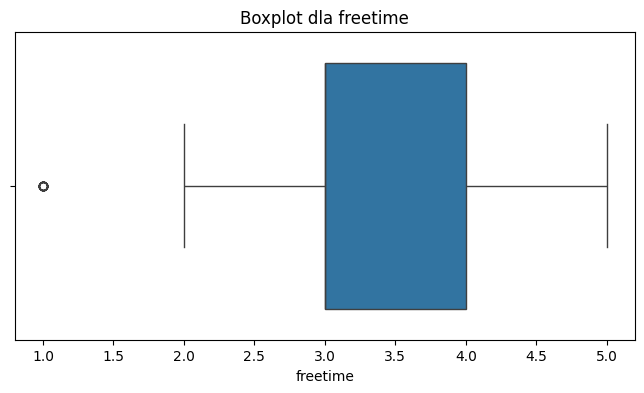

- Kolumna 'goout': Brak wartości odstających.
- Kolumna 'Dalc': 18 wartości odstających.


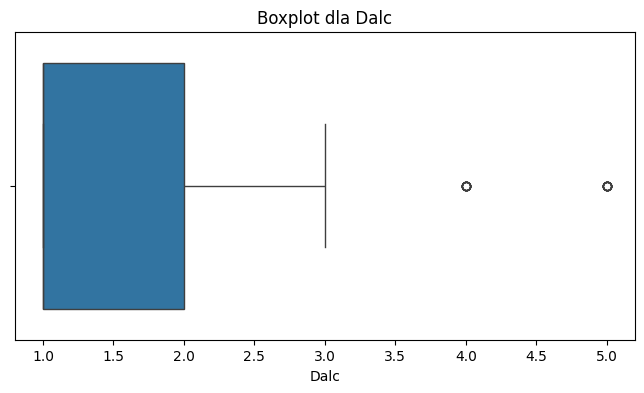

- Kolumna 'Walc': Brak wartości odstających.
- Kolumna 'health': Brak wartości odstających.
- Kolumna 'absences': 15 wartości odstających.


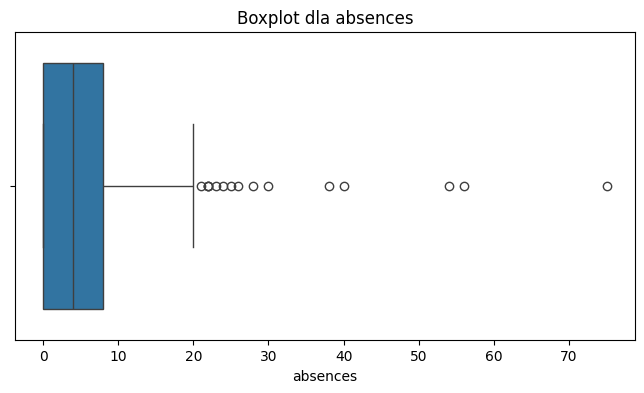

- Kolumna 'G1': Brak wartości odstających.
- Kolumna 'G2': 13 wartości odstających.


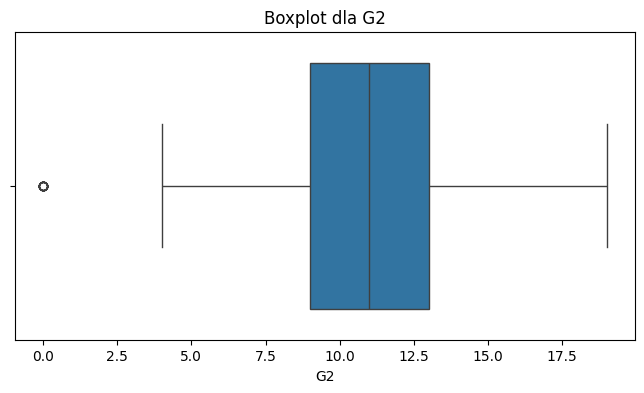

- Kolumna 'G3': Brak wartości odstających.


In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print("\nWykrywanie wartości odstających w kolumnach numerycznych:")
for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    num_outliers = outliers.shape[0]
    if num_outliers > 0:
        print(f"- Kolumna '{col}': {num_outliers} wartości odstających.")
        # Opcjonalnie: Wizualizacja rozkładu z outliers
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot dla {col}')
        plt.show()
    else:
        print(f"- Kolumna '{col}': Brak wartości odstających.")

In [ ]:
profile = ProfileReport(
    df,
    title="Raport Profilowania Danych",
    explorative=True,
)

# Zapisywanie raportu do pliku HTML
profile.to_file(os.path.join('..', os.path.join(REPORTS_DIR_PATH, 'raport_profilowania.html')))

print("\nRaport profilowania danych został zapisany jako 'raport_profilowania.html'.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Raport profilowania danych został zapisany jako 'raport_profilowania.html'.
